In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
svp  = pd.read_csv("h1n1_vaccine_prediction.csv")
svp = svp.drop('unique_id', axis = 1)
svp.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
svp.shape

(26707, 33)

In [4]:
svp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [5]:
svp.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [6]:
svp.columns[svp.isnull().sum()*100/svp.shape[0]>40]

Index(['has_health_insur'], dtype='object')

In [7]:
svp.has_health_insur.value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [8]:
#svp.h1n1_worry.value_counts()
#svp.h1n1_awareness.value_counts()
#svp.antiviral_medication.value_counts()
#svp.contact_avoidance.value_counts()
#svp.bought_face_mask.value_counts()
#svp.wash_hands_frequently.value_counts()
#svp.avoid_large_gatherings.value_counts()
#svp.avoid_touch_face.value_counts()
#svp.dr_recc_h1n1_vacc.value_counts()
#svp.dr_recc_seasonal_vacc.value_counts()
#svp.chronic_medic_condition.value_counts()
#svp.cont_child_undr_6_mnths.value_counts()
#svp.is_health_worker.value_counts()
#svp.has_health_insur.value_counts()
#svp.is_h1n1_vacc_effective.value_counts()
#svp.is_h1n1_risky.value_counts()
#svp.sick_from_h1n1_vacc.value_counts()
#svp.is_seas_vacc_effective.value_counts()
#svp.is_seas_risky.value_counts()
#svp.sick_from_seas_vacc.value_counts()
#svp.qualification.value_counts()
#svp.income_level.value_counts()
#svp.marital_status.value_counts()
#svp.housing_status.value_counts()
#svp.employment.value_counts()
#svp.no_of_adults.value_counts()
#svp.no_of_children.value_counts()
svp.reduced_outside_home_cont.value_counts()



0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [9]:
svp.h1n1_worry = svp.h1n1_worry.fillna(0.0)
svp.h1n1_awareness = svp.h1n1_awareness.fillna(1.0)
svp.antiviral_medication = svp.antiviral_medication.fillna(0.0)
svp.contact_avoidance = svp.contact_avoidance.fillna(1.0)
svp.bought_face_mask = svp.bought_face_mask.fillna(0.0)
svp.wash_hands_frequently = svp.wash_hands_frequently.fillna(1.0)
svp.avoid_large_gatherings = svp.avoid_large_gatherings.fillna(0.0)
svp.avoid_touch_face = svp.avoid_touch_face.fillna(1.0)
svp.dr_recc_h1n1_vacc = svp.dr_recc_h1n1_vacc.fillna(0.0)
svp.dr_recc_seasonal_vacc = svp.dr_recc_seasonal_vacc.fillna(0.0)
svp.chronic_medic_condition = svp.chronic_medic_condition.fillna(1.0)
svp.cont_child_undr_6_mnths = svp.cont_child_undr_6_mnths.fillna(0.0)
svp.is_health_worker = svp.is_health_worker.fillna(0.0)
svp.has_health_insur = svp.has_health_insur.fillna(0.0)
svp.is_h1n1_vacc_effective = svp.is_h1n1_vacc_effective.fillna(4.0)
svp.is_h1n1_risky = svp.is_h1n1_risky.fillna(2.0)
svp.sick_from_h1n1_vacc = svp.sick_from_h1n1_vacc.fillna(2.0)
svp.is_seas_vacc_effective = svp.is_seas_vacc_effective.fillna(4.0)
svp.is_seas_risky = svp.is_seas_risky.fillna(2.0)
svp.sick_from_seas_vacc = svp.sick_from_seas_vacc.fillna(1.0)
svp.qualification = svp.qualification.fillna('College Graduate')
svp.income_level = svp.income_level.fillna('<= $75,000, Above Poverty')
svp.marital_status = svp.marital_status.fillna('Married')
svp.housing_status = svp.housing_status.fillna('Own')
svp.employment = svp.employment.fillna('Employed')
svp.no_of_adults = svp.no_of_adults.fillna(1.0)
svp.no_of_children = svp.no_of_children.fillna(1.0)
svp.reduced_outside_home_cont = svp.reduced_outside_home_cont.fillna(0.0)

In [10]:
svp.isnull().sum() > 0

h1n1_worry                   False
h1n1_awareness               False
antiviral_medication         False
contact_avoidance            False
bought_face_mask             False
wash_hands_frequently        False
avoid_large_gatherings       False
reduced_outside_home_cont    False
avoid_touch_face             False
dr_recc_h1n1_vacc            False
dr_recc_seasonal_vacc        False
chronic_medic_condition      False
cont_child_undr_6_mnths      False
is_health_worker             False
has_health_insur             False
is_h1n1_vacc_effective       False
is_h1n1_risky                False
sick_from_h1n1_vacc          False
is_seas_vacc_effective       False
is_seas_risky                False
sick_from_seas_vacc          False
age_bracket                  False
qualification                False
race                         False
sex                          False
income_level                 False
marital_status               False
housing_status               False
employment          

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
svp[svp.select_dtypes(include=['object']).columns].shape

(26707, 9)

In [13]:
svp[svp.select_dtypes(include=['object']).columns] = svp[svp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [14]:
svp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(svp, test_size = 0.2)

In [17]:
train.shape

(21365, 33)

In [18]:
train_x = train.iloc[:,0:-1]
train_y = train.iloc[:,-1]
test_x  = test.iloc[:, 0:-1]
test_y  = test.iloc[:, -1]

In [19]:
train_x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
18929,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,3,0,0,1,1,0,1,0.0,2.0
11492,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,1,1,2,0,1,2,1,0.0,0.0
14350,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,3,1,0,1,0,1,0,0.0,0.0
21060,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,3,0,1,1,0,0,0,0.0,0.0
23195,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2,3,1,1,1,1,0,2,0.0,0.0


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt = DecisionTreeClassifier()

In [21]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [22]:
pred = dt.predict(test_x)
pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
tab = confusion_matrix(pred, test_y)
tab

array([[3516,  591],
       [ 656,  579]], dtype=int64)

In [24]:
tab.diagonal().sum()*100 /tab.sum()

76.65668289030326

In [25]:
accuracy_score(pred, test_y)

0.7665668289030326

In [26]:
precision_score(test_y, pred)

0.4688259109311741

In [27]:
roc_auc_score(test_y, pred)

0.6688165302259264

In [28]:
pred_prob = dt.predict_proba(test_x)
pred_prob[:,1]

array([0., 1., 0., ..., 0., 1., 0.])

In [29]:
fpr , tpr, treshold = roc_curve(test_y, pred_prob[:,1])

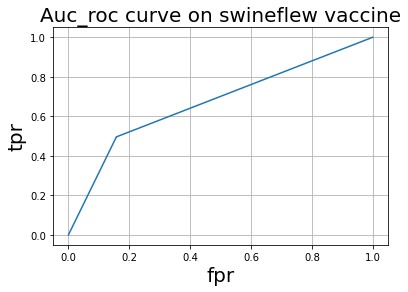

In [30]:
plt.plot(fpr, tpr)
plt.xlabel("fpr", size = 20)
plt.ylabel("tpr", size = 20)
plt.title("Auc_roc curve on swineflew vaccine", size = 20)
plt.grid()

In [31]:
#manual oversampling
df1 = train[train.h1n1_vaccine == 1]

train = pd.concat([train, df1])
print(train.shape)
train_x = train.iloc[:, 0:-1]
train_y = train.iloc[:, -1]
test_x  = test.iloc[:, 0:-1]
test_y  = test.iloc[:, -1]

dt.fit(train_x, train_y)

pred = dt.predict(test_x)

print('confusion_matrix',confusion_matrix(pred, test_y))

print('accuracy_score', accuracy_score(test_y, pred))

print('precision_score',precision_score(test_y, pred))

(25869, 33)
confusion_matrix [[3580  613]
 [ 592  557]]
accuracy_score 0.7744290527892175
precision_score 0.48476936466492604


In [32]:
# automatic oversampling
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(train_x, train_y)

pred = dt.predict(test_x)

print('confusion_matrix', confusion_matrix(pred, test_y))
print('accuracy_score', accuracy_score(pred, test_y))
print('precision_score', precision_score(test_y, pred))

confusion_matrix [[3578  614]
 [ 594  556]]
accuracy_score 0.7738674653687757
precision_score 0.4834782608695652


In [33]:
feature_importace = pd.DataFrame({'feature': train_x.columns, 'importance': dt.feature_importances_})
feature_importace

,feature,importance
0,h1n1_worry,0.036126
1,h1n1_awareness,0.027452
2,antiviral_medication,0.006297
3,contact_avoidance,0.015447
4,bought_face_mask,0.009458
5,wash_hands_frequently,0.010689
6,avoid_large_gatherings,0.017595
7,reduced_outside_home_cont,0.014120
8,avoid_touch_face,0.016694
9,dr_recc_h1n1_vacc,0.178307
